In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../../')
import utils.path as path

In [2]:
threshold = 9

In [3]:
gccam_path = path.goback_from_current_dir(0) + r'threshold_0' + str(threshold) + '\\'
cam_path = path.goback_from_current_dir(1) + r'3 Class cam\threshold_0' + str(threshold) + '\\'

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (20, 12)

In [5]:
df = pd.read_csv(gccam_path + 'IoU.csv')

In [6]:
df_z = df.loc[df['IoU'] == 0]
df_nz = df.loc[df['IoU'] != 0]

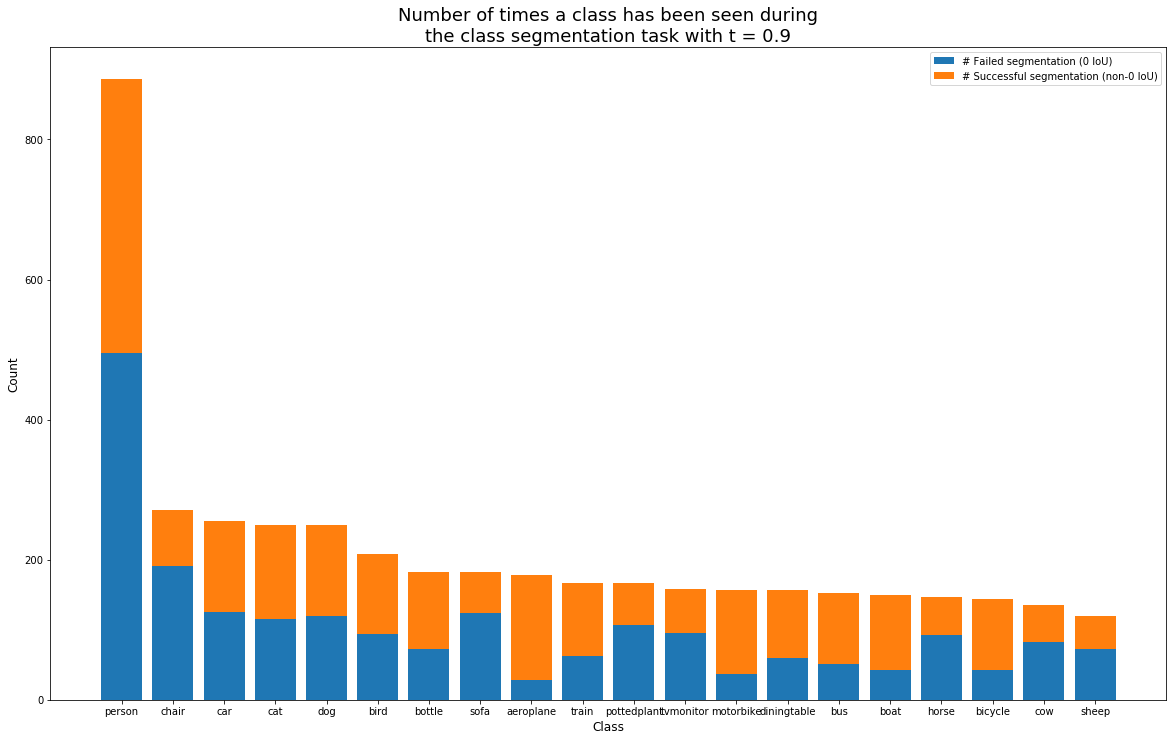

In [7]:
count_z = df_z.groupby(['Class']).size().reset_index(name='Count_z').set_index('Class')
count_nz = df_nz.groupby(['Class']).size().reset_index(name='Count_nz').set_index('Class')

count = pd.concat([count_z, count_nz], axis=1)
count['Count'] = count['Count_z'] + count['Count_nz']
count = count.sort_values(by=['Count'], ascending=False)

fig, ax = plt.subplots()

ax.bar(count.index, count['Count_z'], label='# Failed segmentation (0 IoU)')
ax.bar(count.index, count['Count_nz'], bottom = count['Count_z'], label='# Successful segmentation (non-0 IoU)')

ax.set_ylabel('Count', fontsize = 12)
ax.set_xlabel('Class', fontsize = 12)
ax.set_title(f'Number of times a class has been seen during\nthe class segmentation task with t = {threshold / 10}',
             fontsize = 18)
ax.legend()

plt.show()
fig.savefig(gccam_path + "Count by class.jpg")

In [8]:
mIoU2 = df.groupby(['Class'], as_index=False).agg(['mean', 'std'])
mIoU2 = mIoU2.sort_values(by=[('IoU','mean')], ascending=False)

No handles with labels found to put in legend.


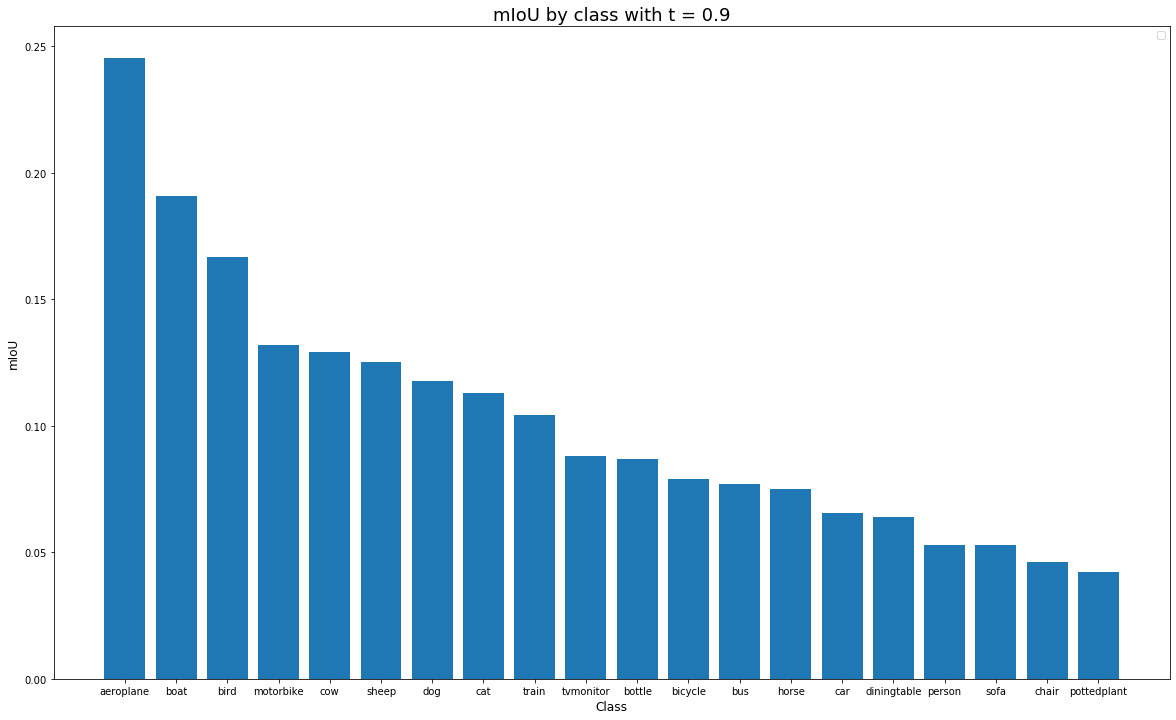

In [9]:
mIoU = df.groupby(['Class']).mean()
mIoU = mIoU.sort_values(by=['IoU'], ascending=False)

fig, ax = plt.subplots()

ax.bar(mIoU.index, mIoU['IoU'])
ax.set_ylabel('mIoU', fontsize = 12)
ax.set_xlabel('Class', fontsize = 12)
ax.set_title(f'mIoU by class with t = {threshold / 10}', fontsize = 18)
ax.legend()

plt.show()
fig.savefig(gccam_path + "mIoU by class.jpg")

No handles with labels found to put in legend.


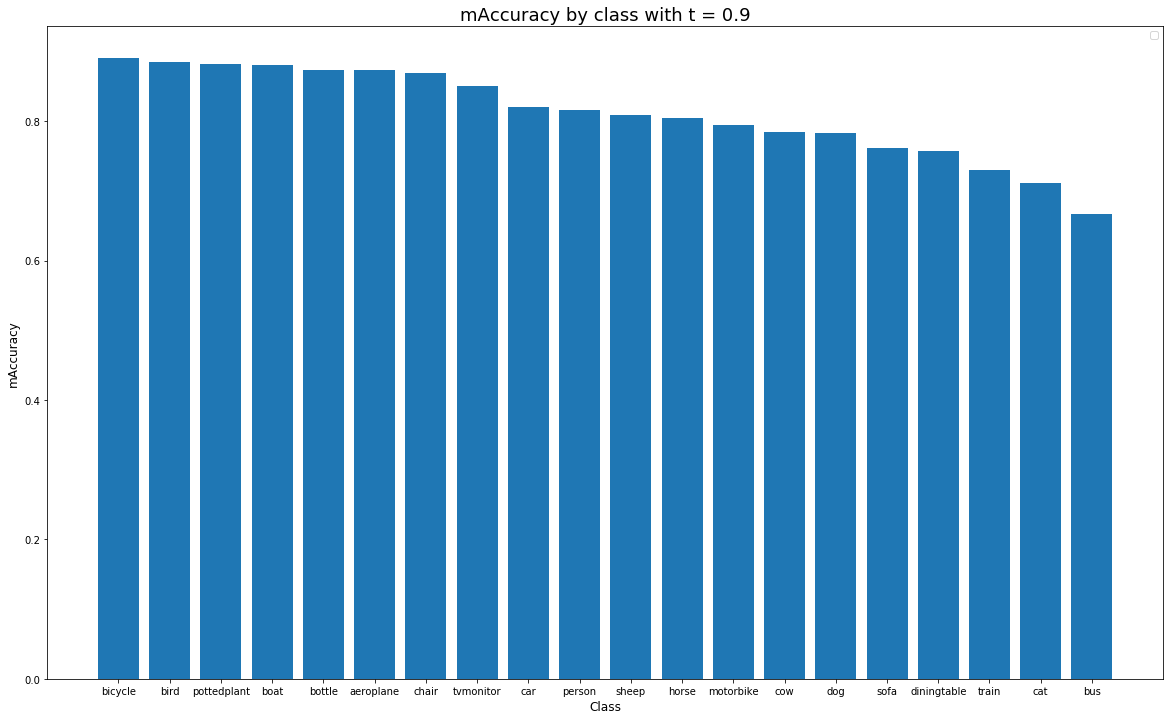

In [10]:
Acc = df.groupby(['Class']).mean()
Acc = Acc.sort_values(by=['Accuracy'], ascending=False)

fig, ax = plt.subplots()

ax.bar(Acc.index, Acc['Accuracy'])
ax.set_ylabel('mAccuracy', fontsize = 12)
ax.set_xlabel('Class', fontsize = 12)
ax.set_title(f'mAccuracy by class with t = {threshold / 10}', fontsize = 18)
ax.legend()

plt.show()
fig.savefig(gccam_path + "mAccuracy by class.jpg")

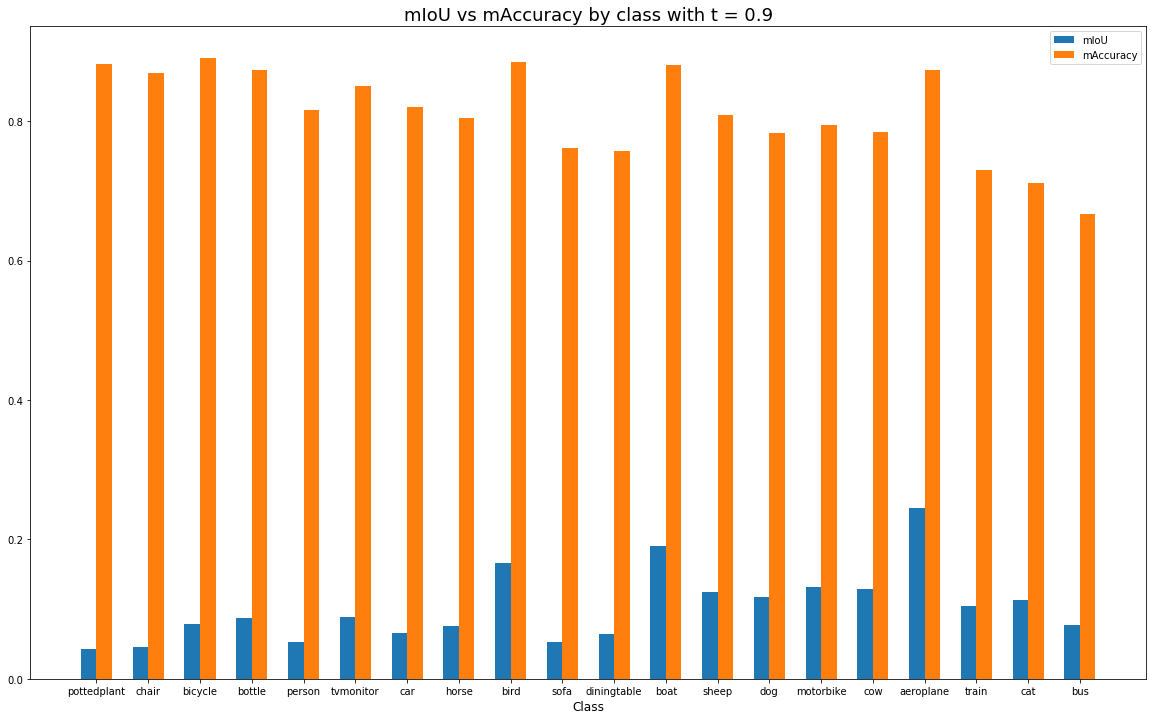

In [11]:
mIoUAcc = df.groupby(['Class']).mean()
mIoUAcc['diff'] = mIoUAcc['Accuracy'] -  mIoUAcc['IoU']
mIoUAcc = mIoUAcc.sort_values(by=['diff'], ascending=False)

fig, ax = plt.subplots()

ind = np.arange(len(mIoUAcc))
width = 0.3   
ax.bar(ind, mIoUAcc['IoU'], width, label = "mIoU")
ax.bar(ind + width, mIoUAcc['Accuracy'], width, label = "mAccuracy")
ax.set_xlabel('Class', fontsize = 12)
ax.set_title(f'mIoU vs mAccuracy by class with t = {threshold / 10}', fontsize = 18)
ax.legend()
plt.xticks(ind + width / 2, mIoUAcc.index)

plt.show()
fig.savefig(gccam_path + "mIoU vs mAccuracy by class.jpg")

In [12]:
df_cam = pd.read_csv(cam_path + 'IoU.csv')

In [13]:
df_c = pd.DataFrame(list(zip(df['Class'], df['IoU'], df_cam['IoU'], df['Accuracy'], df_cam['Accuracy'])),
               columns =['Class', 'IoU gccam', 'IoU cam', 'Accuracy gccam', 'Accuracy cam'])

In [14]:
summary = 'Task: Class segmentation' + f'\nThreshold = {threshold / 10}' + '\nImages  ' + str(len(np.unique(df['Name']))) + '\nClasses ' + str(len(df)) + '\nmIoU of cam         = ' + "{:.3f}".format(df_c['IoU cam'].mean()) + '\nmIoU of grabcut-cam = ' + "{:.3f}".format(df_c['IoU gccam'].mean()) + '\nmAccuracy of cam         = ' + "{:.3f}".format(df_c['Accuracy cam'].mean()) + '\nmAccuracy of grabcut-cam = ' + "{:.3f}".format(df_c['Accuracy gccam'].mean())
            
print(summary)
text_file = open(gccam_path + "summary.txt", "w")
text_file.write(summary)
text_file.close()

Task: Class segmentation
Threshold = 0.9
Images  2913
Classes 4318
mIoU of cam         = 0.019
mIoU of grabcut-cam = 0.093
mAccuracy of cam         = 0.818
mAccuracy of grabcut-cam = 0.813


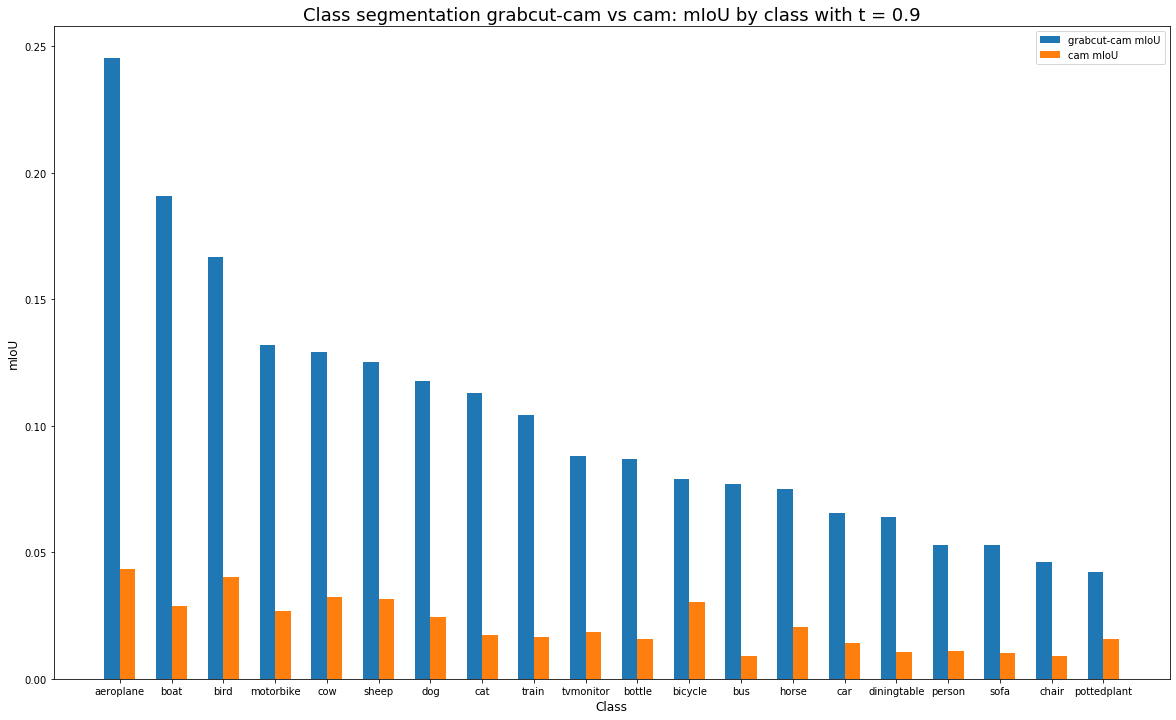

In [15]:
mIoU_c = df_c.groupby(['Class']).mean()
mIoU_c = mIoU_c.sort_values(by=['IoU gccam'], ascending=False)

fig, ax = plt.subplots()

ind = np.arange(len(mIoU_c))
width = 0.3   
ax.bar(ind, mIoU_c['IoU gccam'], width, label = "grabcut-cam mIoU")
ax.bar(ind + width, mIoU_c['IoU cam'], width, label = "cam mIoU")
ax.set_ylabel('mIoU', fontsize = 12)
ax.set_xlabel('Class', fontsize = 12)
ax.set_title(f'Class segmentation grabcut-cam vs cam: mIoU by class with t = {threshold / 10}', fontsize = 18)
ax.legend()
plt.xticks(ind + width / 2, mIoU_c.index)

plt.show()
fig.savefig(gccam_path + "Class sgm - mIoU by class gc-cam vs cam.jpg")

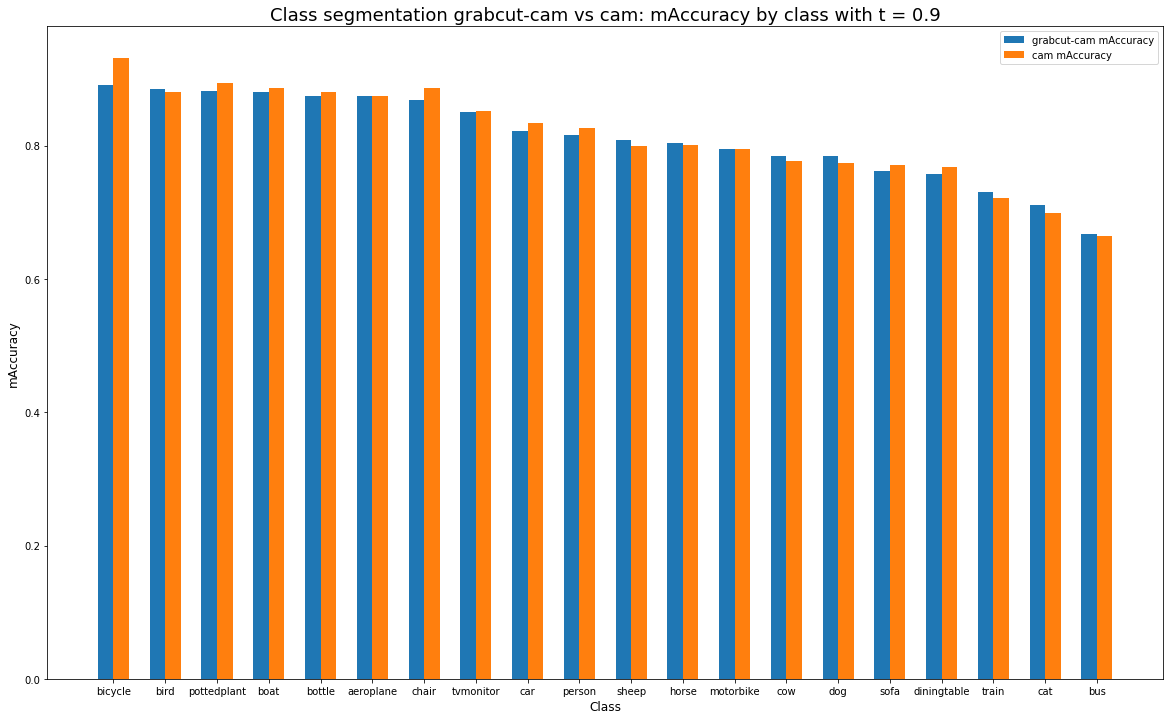

In [16]:
Acc_c = df_c.groupby(['Class']).mean()
Acc_c = Acc_c.sort_values(by=['Accuracy gccam'], ascending=False)

fig, ax = plt.subplots()

ind = np.arange(len(Acc_c))
width = 0.3   
ax.bar(ind, Acc_c['Accuracy gccam'], width, label = "grabcut-cam mAccuracy")
ax.bar(ind + width, Acc_c['Accuracy cam'], width, label = "cam mAccuracy")
ax.set_ylabel('mAccuracy', fontsize = 12)
ax.set_xlabel('Class', fontsize = 12)
ax.set_title(f'Class segmentation grabcut-cam vs cam: mAccuracy by class with t = {threshold / 10}', fontsize = 18)
ax.legend()
plt.xticks(ind + width / 2, Acc_c.index)

plt.show()
fig.savefig(gccam_path + "Class sgm - mAccuracy by class gc-cam vs cam.jpg")